https://www.kaggle.com/arashnic/data-on-covid19-variants-in-the-eueea-data  
Country: [String]  
country_code: 2-letter ISO country code [String]  
year_week: yyyy-Www  
Source: Data source, either GISAID EpiCoV database or TESSy. [String]  
new_cases: Weekly number of new confirmed cases. Set to zero in the event that countries have negative case counts due to retrospective correction of data. [Numeric]  
number_sequenced: Weekly number of sequences carried out [Numeric]  
percentcasessequenced 100 x newcases/numbersequenced. [Numeric]  
validdenominator: GISAID data: TRUE , TESSY data: FALSE if there are discrepancies in the data reported for a given week, such as where the sum of numberdetectionsvariant across all variants exceeds numbersequenced (aggregate data), or where no sequences have been reported that are coded as
‘wild type’ (case -based data). [Numeric]  
Variant: Each VOC, Other or UNK [Numeric]  
numberdetectionsvariant: Number of detections reported of the variant [Numeric]  
percentvariant : 100 x numberdetectionsvariant/ numbersequenced. Np value given if valid_denominator == FALSE [Numeric]

In [1]:
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#Functions
def replaceDate(inputString):
    repString=inputString.replace("-"," ")+" 0"
    repString=datetime.strptime(repString,"%Y %W %w")
    return repString

def 

In [3]:
#import csv and sort by variant+week, remove TESSy data
v_df=pd.read_csv("variants.csv",header=0);
v_df=v_df.drop(columns=["country_code","valid_denominator"]);
v_df=v_df.sort_values(by=['year_week','variant']);
v_df=v_df.loc[v_df["source"]=="GISAID"];
v_df=v_df.drop(columns=["source"]);
v_df["year_week"]=v_df["year_week"].apply(replaceDate)
v_df.to_csv('filtered_df.csv',index=False);

<AxesSubplot:>

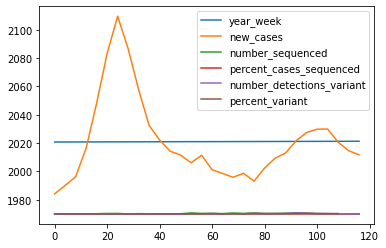

In [4]:
#select a country and make dfs of each variant
COUNTRY_SELECTED="Austria";
selected_df=v_df.loc[v_df["country"]==COUNTRY_SELECTED];
selected_df=selected_df.drop(columns=["country"]);
sel_B117_df=selected_df.loc[selected_df["variant"]=="B.1.1.7"];
sel_B351_df=selected_df.loc[selected_df["variant"]=="B.1.351"];
sel_OTHR_df=selected_df.loc[selected_df["variant"]=="Other"];
sel_P1_df=selected_df.loc[selected_df["variant"]=="P.1"];

sel_B117_df.plot()